In [2]:
import pandas as pd
import numpy as np
import sys
import pylab
import seaborn as sns
import statsmodels as stat
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('C:/Users/aiger/Desktop/MSFE/IE517/HW3/HY_bond.csv')
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [4]:
df.shape


(2721, 37)

In [5]:
#Clean dataset
#Missing value
print(df.isna().sum())

CUSIP                         0
Ticker                        0
Issue Date                    0
Maturity                      0
1st Call Date                 0
Moodys                        0
S_and_P                       0
Fitch                         0
Bloomberg Composite Rating    0
Coupon                        0
Issued Amount                 0
Maturity Type                 0
Coupon Type                   0
Maturity At Issue months      0
Industry                      0
LiquidityScore                0
Months in JNK                 0
Months in HYG                 0
Months in Both                0
IN_ETF                        0
LIQ SCORE                     0
n_trades                      0
volume_trades                 0
total_median_size             0
total_mean_size               0
n_days_trade                  0
days_diff_max                 0
percent_intra_dealer          0
percent_uncapped              0
bond_type                     0
Client_Trade_Percentage       0
weekly_m

In [5]:
print(df.isnull().sum())

CUSIP                         0
Ticker                        0
Issue Date                    0
Maturity                      0
1st Call Date                 0
Moodys                        0
S_and_P                       0
Fitch                         0
Bloomberg Composite Rating    0
Coupon                        0
Issued Amount                 0
Maturity Type                 0
Coupon Type                   0
Maturity At Issue months      0
Industry                      0
LiquidityScore                0
Months in JNK                 0
Months in HYG                 0
Months in Both                0
IN_ETF                        0
LIQ SCORE                     0
n_trades                      0
volume_trades                 0
total_median_size             0
total_mean_size               0
n_days_trade                  0
days_diff_max                 0
percent_intra_dealer          0
percent_uncapped              0
bond_type                     0
Client_Trade_Percentage       0
weekly_m

In [6]:
df.iloc[0,5]

'Nan'

In [7]:
type(df.iloc[0,5])

str

In [8]:
pd.isna(df.iloc[0,5])

False

In [9]:
print(df.shape)

(2721, 37)


In [11]:
df1=df.dropna(inplace=False)

In [12]:
print(df1.shape)

(2721, 37)


In [13]:
for i in df.columns:
    if 'Nan' in df[i].tolist():
        print(i)

1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Months in JNK
Months in HYG
Months in Both


In [14]:
moodys=df['Moodys'][-df['Moodys'].isin(['Nan'])]
print(moodys)

1       Ba1
2        WR
3        WR
4        B1
5        WR
       ... 
2716     B1
2717    Ba1
2718     WR
2719    Ba2
2720    Ba2
Name: Moodys, Length: 2560, dtype: object


In [15]:
fitch=df['Fitch'][-df['Fitch'].isin(['Nan'])]
print(fitch)

1       BBB
2       BB+
3        WD
4        BB
5        WD
       ... 
2705     WD
2706     WD
2707     WD
2708     WD
2718    BB+
Name: Fitch, Length: 1551, dtype: object


In [15]:
#print(len(df['Moodys']))
#a=0
#for i in df['Moodys']
#   if i=='Nan'
#   a+= 1
# print (a)

In [16]:
df2=df

for i in df2.columns.tolist():
    df2=df2[-df2[i].isin(['Nan'])]
df2

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
22,00130HBS3,AES,8/1/2012,7/1/2021,6/1/2021,Ba2,BB,BB,BB,7.38,...,0.309374,0.791453,1,0.363135,7.585082e+06,6374500.0,30366000.0,5000.0,18.947761,1
23,00130HBT1,AES,4/30/2013,5/15/2023,5/15/2018,Ba2,BB,BB,BB,4.88,...,0.340488,0.852679,1,0.244677,7.117121e+06,5446000.0,97500000.0,60000.0,25.212121,2
24,00130HBU8,AES,3/7/2014,3/15/2024,3/15/2019,Ba2,BB,BB,BB,5.50,...,0.354534,0.835642,1,0.324307,7.704124e+06,5978000.0,116644000.0,140000.0,25.612903,1
26,00130HBW4,AES,4/6/2015,4/15/2025,4/15/2020,Ba2,BB,BB,BB,5.50,...,0.324896,0.830374,1,0.363808,5.979177e+06,4452000.0,51280000.0,80000.0,20.361538,2
27,00130HBX2,AES,5/25/2016,5/15/2026,5/15/2021,Ba2,BB,BB,BB,6.00,...,0.292940,0.765016,1,0.323498,5.515944e+06,4112500.0,56750000.0,63000.0,13.180556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,62913TAE2,NGL,2/10/2015,7/15/2019,6/15/2019,B2,B+,B,B,5.13,...,0.439719,0.886071,2,0.221615,4.178433e+06,3493500.0,18149000.0,30000.0,19.126866,1
2693,62913TAH5,NGL,10/24/2016,11/1/2023,11/1/2019,B2,B+,B,B,7.50,...,0.196302,0.625889,1,0.452347,1.102370e+07,6640000.0,134070000.0,50000.0,16.348837,1
2695,62913TAL6,NGL,2/22/2017,3/1/2025,3/1/2020,B2,B+,B,B,6.13,...,0.246753,0.493506,1,0.444805,8.846423e+06,3431500.0,71000000.0,55000.0,11.846154,1
2707,629377BS0,NRG,2/21/2012,5/15/2021,10/16/2017,B1,BB-,WD,B+,7.88,...,0.334536,0.874882,1,0.323193,9.737653e+06,7328000.0,74855000.0,110000.0,39.989691,1


In [17]:
df2.columns.tolist()

['CUSIP',
 'Ticker',
 'Issue Date',
 'Maturity',
 '1st Call Date',
 'Moodys',
 'S_and_P',
 'Fitch',
 'Bloomberg Composite Rating',
 'Coupon',
 'Issued Amount',
 'Maturity Type',
 'Coupon Type',
 'Maturity At Issue months',
 'Industry',
 'LiquidityScore',
 'Months in JNK',
 'Months in HYG',
 'Months in Both',
 'IN_ETF',
 'LIQ SCORE',
 'n_trades',
 'volume_trades',
 'total_median_size',
 'total_mean_size',
 'n_days_trade',
 'days_diff_max',
 'percent_intra_dealer',
 'percent_uncapped',
 'bond_type',
 'Client_Trade_Percentage',
 'weekly_mean_volume',
 'weekly_median_volume',
 'weekly_max_volume',
 'weekly_min_volume',
 'weekly_mean_ntrades',
 'weekly_median_ntrades']

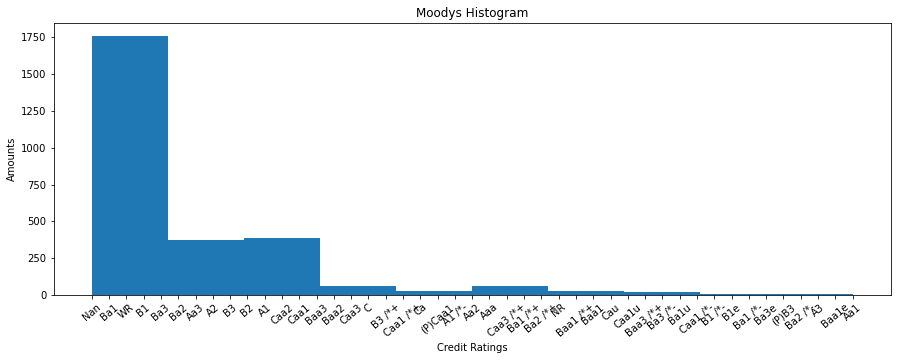

In [17]:
#Histogram
import matplotlib.pyplot as plt 
plt.figure(figsize=(15, 5))
plt.xlabel('Credit Ratings')
plt.ylabel('Amounts')
plt.title('Moodys Histogram')
plt.xticks(fontsize=10, rotation =40)
_=plt.hist(df['Moodys'])
#from the we can see that the most issued bonds had ratings like Ba1 or B1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

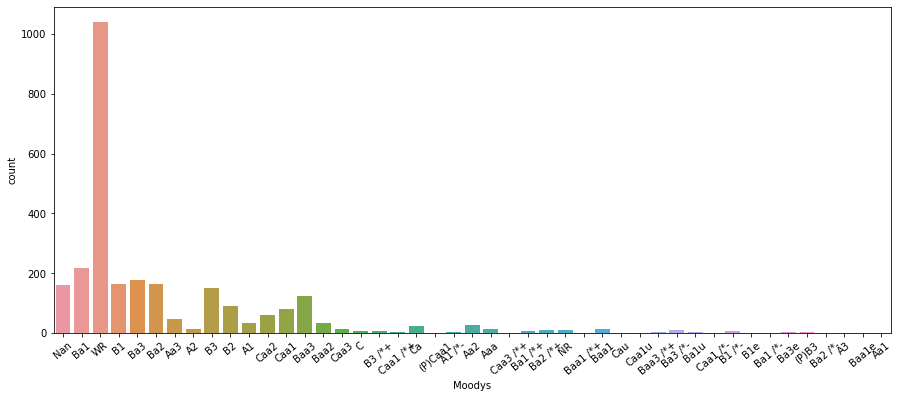

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(df['Moodys'])
plt.xticks(fontsize=10, rotation =40)

((array([-3.47575636, -3.23032128, -3.09450184, ...,  3.09450184,
          3.23032128,  3.47575636]),
  array([0.        , 0.        , 0.        , ..., 0.66666667, 0.66666667,
         1.        ])),
 (0.15007980071246574, 0.24430596794671078, 0.985346783790334))

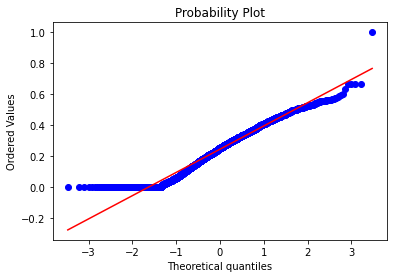

In [20]:
#QQ plot 
stats.probplot(df['percent_intra_dealer'], dist='norm', plot=pylab)

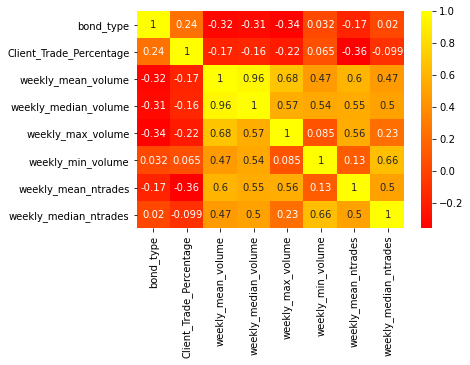

In [66]:
#Standartization
X=df.iloc[:, 29:36]
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)
corMat= pd.DataFrame(df.iloc[:, 29:37].corr())
sns.heatmap(corMat,annot=True,cmap='autumn')


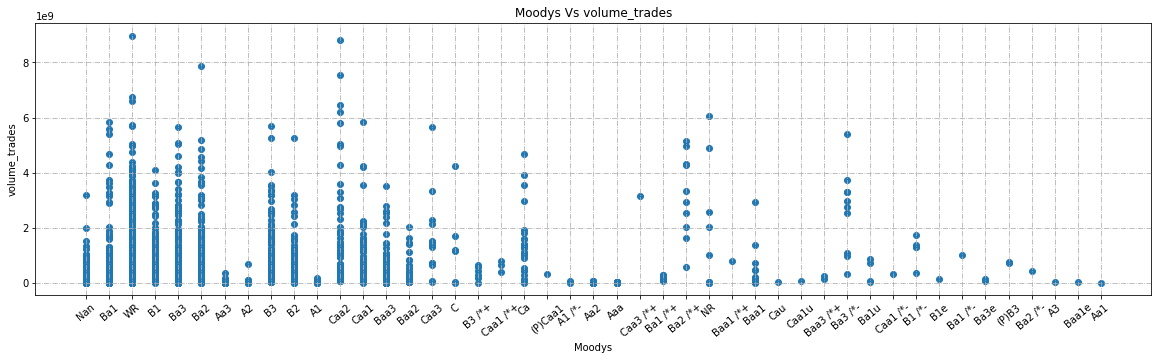

In [38]:
#Scatter plot
plt.figure(figsize=(20,5))
plt.grid(True, linestyle= '-.')
plt.xlabel('Moodys')
plt.ylabel('volume_trades')
plt.title('Moodys Vs volume_trades')
plt.xticks(fontsize=10, rotation =40)
_=plt.scatter(df['Moodys'],df['volume_trades'])
#from the graph we can see that Volume_trade is higher when, Moody's rating is higher

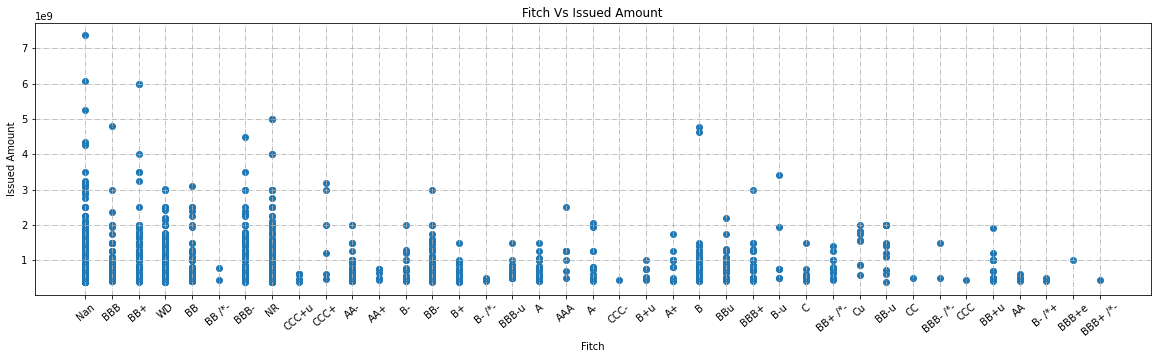

In [40]:
#Scatter plot
plt.figure(figsize=(20,5))
plt.grid(True, linestyle= '-.')
plt.xlabel('Fitch')
plt.ylabel('Issued Amount')
plt.title('Fitch Vs Issued Amount')
plt.xticks(fontsize=10, rotation =40)
_=plt.scatter(df['Fitch'],df['Issued Amount'])
#This graph actually is not highly helpful
#there we can do further development of the code and place Issued amount in the ascending order in order to see if there 
#is a correlation between these two variables.
#Bu we can say that bond with rating BB+ are the most common issed ones

In [67]:
print("My name is Aigerim")
print("My NetID is: aigerim4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")


My name is Aigerim
My NetID is: aigerim4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
